# Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and inspect the Dataset

In [37]:
df = pd.read_csv("Dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


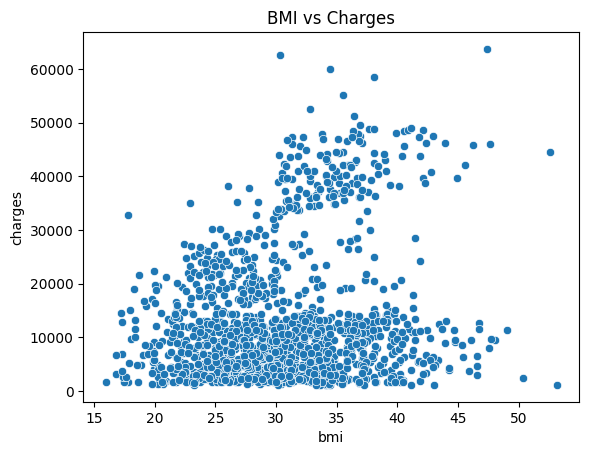

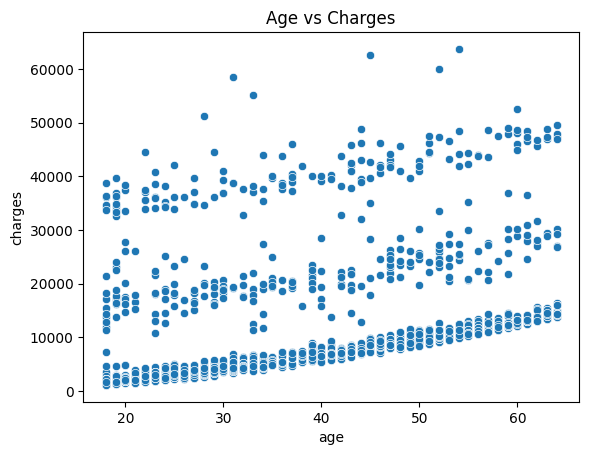

In [56]:
# Plot BMI vs Charges
sns.scatterplot(x=df['bmi'], y=df['charges'])
plt.title("BMI vs Charges")
plt.show()

# Plot Age vs Charges
sns.scatterplot(x=df['age'], y=df['charges'])
plt.title("Age vs Charges")
plt.show()

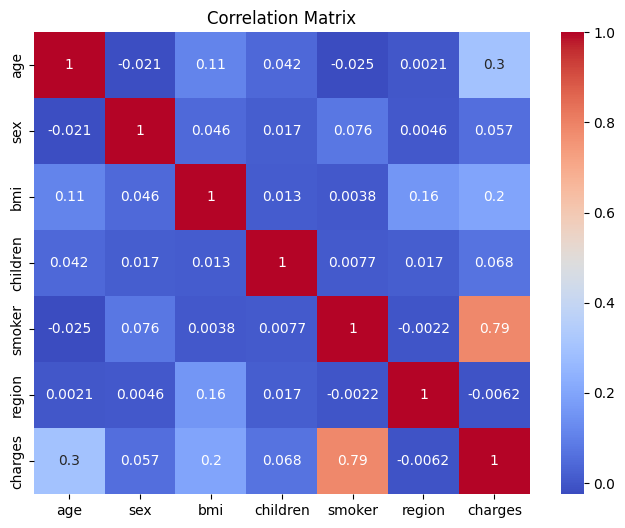

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## define feature x and target y

In [42]:
x = df.drop(columns=['charges'])
y = df['charges']

x.shape, y.shape

((1338, 6), (1338,))

In [43]:
y.mean()

np.float64(13270.422265141257)

## spliting the data into training and testing sets

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape , x_test.shape

((1070, 6), (268, 6))

## Training Linear regression model

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

model.coef_ , model.intercept_

(array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
         2.36478181e+04, -2.71284266e+02]),
 np.float64(-11946.606567263034))

In [46]:
y_pred = model.predict(x_test)

y_pred[:5]

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 ])

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

mae, mse, rmse, r2

(4186.508898366432, 33635210.431178406, 5799.587091438356, 0.7833463107364539)

In [48]:
tmse = mean_squared_error(y_train, model.predict(x_train))
testmse = mean_squared_error(y_test,model.predict(x_test))
tmse, testmse

(37280663.22256598, 33635210.431178406)

since model has higher errors trying to improve it via feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train_scaled,y_train)

model.coef_ , model.intercept_

(array([ 3.61610865e+03, -9.39295411e+00,  2.02830858e+03,  5.16662566e+02,
         9.55714338e+03, -3.02387980e+02]),
 np.float64(13346.089736364485))

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
y_pred = model.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

mae, mse, rmse, r2

(4186.562998121062, 33638710.48270799, 5799.888833650865, 0.7833237659369185)

### scaling doesn't improve the model efficiency
### trying more powerful models

In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(x_train,y_train)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_xgb, mse_xgb, rmse_xgb, r2_xgb

(2445.7743748322937,
 19596756.560113486,
 np.float64(4426.822399883858),
 0.8737718732268553)

### hyper tuning model

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate':[0.01,0.05,0.1,0.2],
              'max_depth':[3,5,7,10]}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5, n_jobs= -1)
grid_search.fit(x_train,y_train)

grid_search.best_params_, -grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50},
 np.float64(2607.4095848244374))

In [54]:
best_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                            learning_rate= 0.1, max_depth = 3,
                            n_estimators = 50)

best_xgb.fit(x_train,y_train)
y_pred_best = best_xgb.predict(x_test) 

In [57]:
mae_xgb_best = mean_absolute_error(y_test, y_pred_best)
mse_xgb_best = mean_squared_error(y_test, y_pred_best)
rmse_xgb_best = np.sqrt(mse_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_best)
mae_xgb_best, mse_xgb_best, rmse_xgb_best, r2_xgb_best

(2428.543760793843,
 17932601.908238288,
 np.float64(4234.69029661418),
 0.884491153416036)

In [64]:
import pickle

with open ("xgboost.pkl","wb") as model_file:
    pickle.dump(best_xgb, model_file)

"model saved successfully"

'model saved successfully'

In [79]:
with open ("xgboost.pkl","rb") as model_file:
    loaded_model = pickle.load(model_file)

prediction = loaded_model.predict(x_test.iloc[2].values.reshape(1,-1))
print(prediction)
print(x_test.iloc[2].values.reshape(1,-1))

[27338.336]
[[64.     0.    26.885  0.     1.     1.   ]]
